In [1]:
#Import libraries
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Create SQLite connection
happiness_path = Path('../Resources/HappinessIndexScore.sqlite')
engine = create_engine(f'sqlite:///{happiness_path}')

In [3]:
# Create df
happiness_df = pd.read_sql('SELECT * FROM final_output', con=engine)
happiness_df.head()

,country,region,ladder_score,logged_GPD_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita
0,Finland,Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,16.60,7.16,43.2,27.7,3.24,8.23
1,Denmark,Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196,138.00,5.14,42.2,27.7,9.77,9.16
2,Iceland,Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3.50,3.56,37.8,26.1,2.11,7.72
3,Israel,Middle East,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,412.24,3.39,30.1,38.6,20.23,3.07
4,Netherlands,Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379,420.38,3.56,42.2,29.2,11.72,8.23


In [4]:
# Drop unnecesary columns
happiness_df.drop(['country', 'region'], inplace= True, axis= 1)

In [5]:
# Define features set & drop lader score column from X variable
X = happiness_df.copy()
X = happiness_df.drop(columns=['ladder_score'])


In [6]:
# Define target vector
y = happiness_df["ladder_score"].ravel()

/var/folders/tg/jpl0p2w93ndfvsd8ln2wc1pw0000gn/T/ipykernel_70127/3483704943.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = happiness_df["ladder_score"].ravel()


In [7]:
#Splitting into Train and Test sets
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=48)

In [8]:
lm = LinearRegression()

In [9]:
# train the linear regression model
lm.fit(x_train, y_train)

LinearRegression()

## Evaluate our model

In [10]:
#Print the intercept
print(lm.intercept_)

-3.0335198822859413


In [11]:
#Print the coefficient. Positive coeff means value of independent variable increases. 
# A negative coeff suggests that as the independent variable increases, the dependent variable tend to decrease
#Source: https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/
print(lm.coef_)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

[ 4.03559603e-01  3.67245059e+00  3.66962020e-02  8.02581316e-01
  7.44878113e-02 -7.52233191e-01 -1.18874368e-04 -3.62926422e-02
 -1.75633128e-02  1.08966212e-02 -9.84821291e-03 -7.23487785e-03]


,Coeff
logged_GPD_per_capita,0.403560
social_support,3.672451
healthy_life_expectancy,0.036696
freedom_life_choices,0.802581
generosity,0.074488
perceptions_corruption,-0.752233
population_density,-0.000119
unemployment_rate,-0.036293
median_age,-0.017563
gini_coefficient,0.010897


In [12]:
predictions = lm.predict(x_test)
predictions

array([4.5839542 , 6.62003256, 5.58543992, 6.50797847, 6.04371884,
       4.66113356, 3.96676264, 3.80232254, 4.70937181, 3.93934683,
       4.26057094, 5.40673869, 4.13191998, 4.86363159, 3.81793289,
       5.56941103, 2.14436479, 5.86649295, 5.27004644, 7.30741542,
       7.26965374, 4.5987705 , 3.99122718, 3.90432519, 6.49651234,
       6.48934642, 5.66020143, 4.6038019 , 4.9716989 , 7.28120569,
       5.76333214])

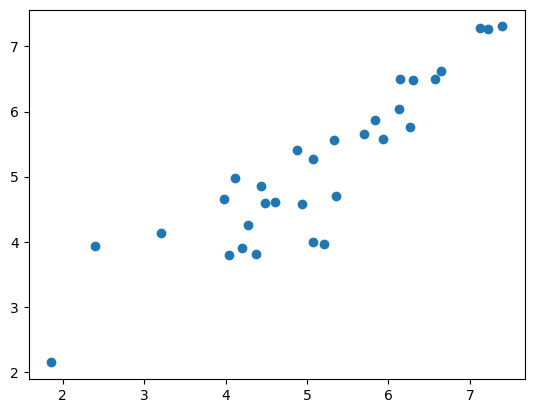

In [13]:
plt.scatter(y_test, predictions)

In [14]:
#Regression evaluation matrix 
metrics.mean_absolute_error(y_test, predictions)

0.3932521818313765

In [15]:
metrics.mean_squared_error(y_test, predictions)

0.3034009815942457

In [16]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.5508184651899805

In [17]:
#Source: https://github.com/vivek2319/Linear-Regression-Prediction/blob/master/Linear_Regression_Scikit_learn.py